<a href="https://colab.research.google.com/github/Suryaanugrah2001/predictiodgraduate/blob/main/Prediksi_Pasca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Prediksi Penerimaan Pascasarjana dari perspektif India

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae, r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from google.colab import files
data = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/prediksipasca.csv")
data = pd.DataFrame(data)
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
data.shape

(500, 9)

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Data Hilang

In [10]:
data.isnull().sum()
data.duplicated().sum()

0

Membuat salinan dan menghapus kolom Serial nomor

In [11]:
data1=data.copy()
data1.drop(['Serial No.'],axis=1,inplace=True)


Mengidentifikasi & Menghapus data pencilan/outlier

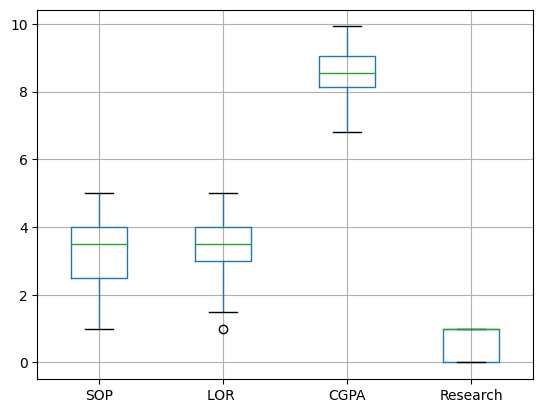

In [14]:
data1.boxplot(column=['SOP','LOR ', 'CGPA', 'Research',])
plt.show()

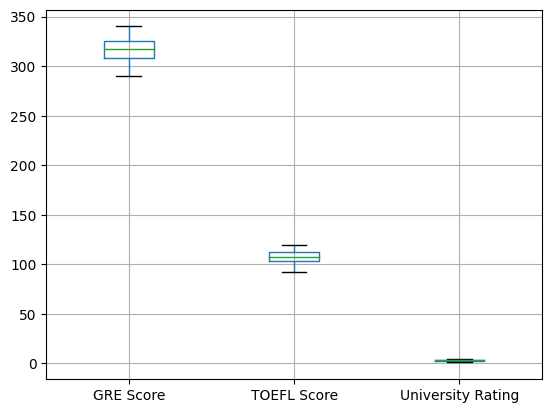

In [15]:
data1.boxplot(column=['GRE Score', 'TOEFL Score', 'University Rating'])
plt.show()

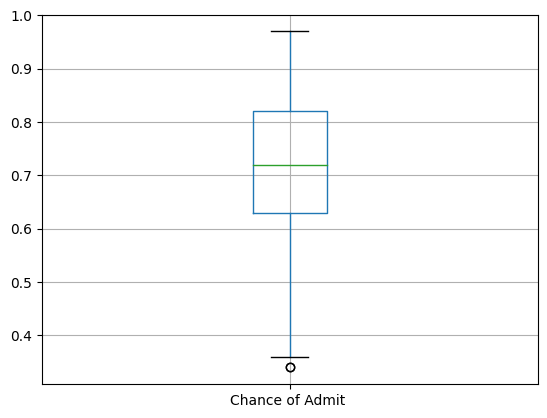

In [16]:
data1.boxplot(column=['Chance of Admit '])
plt.show()


Seperti yang bisa kita lihat, ada outlier pada kolom chance of admit & LOR.

In [18]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR=Q3-Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [22]:
#Batas atas
BA=Q3+IQR*1.5
print(BA)

#Batas bawah
BB=Q1-IQR*1.5
print(BB)

GRE Score            350.50000
TOEFL Score          125.50000
University Rating      7.00000
SOP                    6.25000
LOR                    5.50000
CGPA                  10.40875
Research               2.50000
Chance of Admit        1.10500
dtype: float64
GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.75875
Research              -1.50000
Chance of Admit        0.34500
dtype: float64


In [23]:
data_outliers_removed = data1[(data1>BB) & (data1<BA)]
data_outliers_removed


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [24]:
data_outliers_removed.isnull().sum()

GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                  12
CGPA                  0
Research              0
Chance of Admit       2
dtype: int64

In [25]:
data_outliers_removed.dropna(inplace=True)
data_outliers_removed.shape

(486, 8)

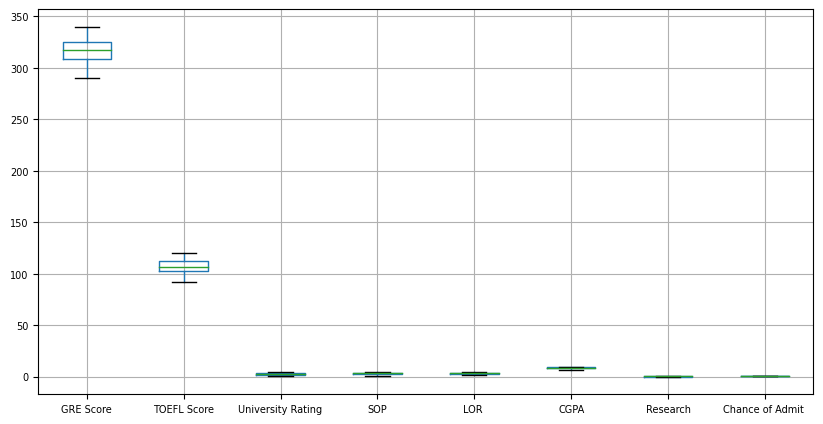

In [26]:
data_outliers_removed.boxplot(figsize=(10,5), fontsize=7)
plt.show()

Seperti yang bisa kita lihat, tidak ada lagi outlier

In [28]:
data2=data_outliers_removed.copy()

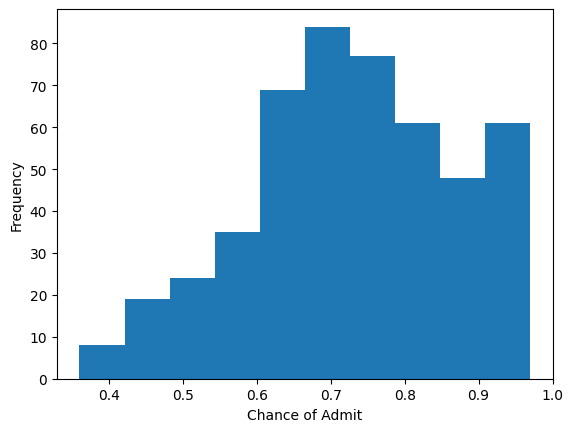

In [29]:
data2['Chance of Admit '].plot.hist()
plt.xlabel('Chance of Admit')
plt.show()

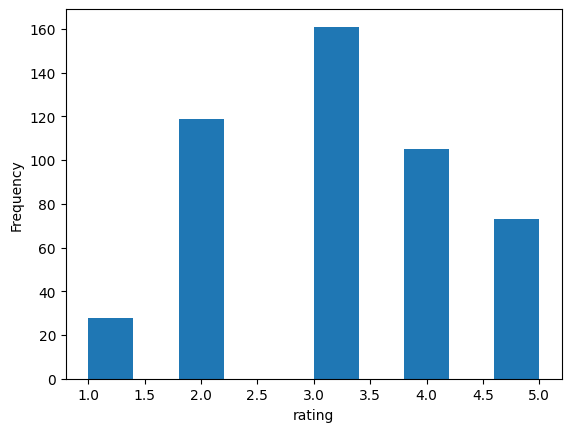

In [30]:
data2['University Rating'].plot.hist()
plt.xlabel('rating')
plt.show()

Seperti yang bisa kita lihat, jumlah maksimum siswa yang mendapat rating dari 3 hingga 3,5

In [31]:
data2['Research'].value_counts()

1    277
0    209
Name: Research, dtype: int64

Terdapat  277 siswa memiliki pengalaman penelitian dan 209 siswa tidak memiliki pengalaman

In [35]:
data2['CGPA'].corr(data2['Chance of Admit '])

0.8821495912854787

In [38]:
data2['TOEFL Score'].corr(data2['Chance of Admit '])

0.7857296232445923

In [40]:
data2['Chance of Admit '].corr(data2['GRE Score'])

0.8031896044373005

In [42]:
data2['CGPA'].corr(data2['GRE Score'])

0.820842484925334

In [43]:

data2['CGPA'].corr(data2['TOEFL Score'])

0.8081094221483272

Siswa yang memiliki CGPA yang bagus, pasti akan mendapatkan nilai yang bagus dalam ujian TOEFL dan GRE.

In [44]:
x=data2.drop(['Chance of Admit '],axis=1)
y=data2['Chance of Admit ']
x.shape,y.shape

((486, 7), (486,))

In [45]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

model regresi linier

In [46]:
lr=LR()

In [47]:
lr.fit(train_x,train_y)

LinearRegression()

In [50]:
train_pre=lr.predict(train_x)
mae_train=mae(train_pre,train_y)
mae_train

0.04052008959676382

In [51]:
test_pre=lr.predict(test_x)
mae_test=mae(test_pre,test_y)

mae_test

0.04345173324962812

Evaluasi Model

In [49]:
n = len(train_x)
m=len(test_x)

In [52]:
RMSE = np.sqrt(mean_squared_error(train_y,train_pre))
MSE = mean_squared_error(train_y, train_pre)
MAE = mean_absolute_error(train_y, train_pre)
r2_train = r2_score(train_y, train_pre)
adj_r2 = 1-(1-r2_train)*(n-1)/(n-mae_train-1)
print(RMSE)
print(MSE)
print(MAE)
print(r2_train)
print(adj_r2)

0.0572018808365434
0.003272055171238111
0.04052008959676382
0.8186071138689355
0.8185868635203288


In [53]:
RMSE_test = np.sqrt(mean_squared_error(test_y,test_pre))
MSE_test = mean_squared_error(test_y, test_pre)
MAE_test = mean_absolute_error(test_y, test_pre)
r2_test = r2_score(test_y, test_pre)
adj_r2_test = 1-(1-r2_test)*(m-1)/(m-mae_test-1)
print(RMSE_test)
print(MSE_test)
print(MAE_test)
print(r2_test)
print(adj_r2_test)

0.06207177414999463
0.003852905146127942
0.04345173324962812
0.8081700586095101
0.8081011467270033


In [55]:
print('Accuracy of train set :',r2_train)
print('Accuracy of test set :',r2_test)

Accuracy of train set : 0.8186071138689355
Accuracy of test set : 0.8081700586095101


Semoga Bermanfaat